In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.ensemble import RandomForestClassifier

In [2]:
data_file_name = '/Users/Jerry/Desktop/CSC373/jupyter notebook/adult.csv'

dataset = pd.read_csv(data_file_name)
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [4]:
dataset.shape

(32561, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data cleaning

We first encode income as a binary variable(0:<=50K,1:>50K)

In [6]:
dataset['income01']=dataset['income'].map({'<=50K':0,'>50K':1})
dataset.drop("income",axis=1,inplace=True)
dataset['income01'].value_counts()

0    24720
1     7841
Name: income01, dtype: int64

Also, we realized that we do not have explicit missing values but there are many rows containing ?. We need to replace them as empty value

In [7]:
dataset = dataset.replace('?', np.nan)
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income01
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [8]:
dataset.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income01             0
dtype: int64

In [9]:
dataset = dataset.dropna()
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income01
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [10]:
data = dataset.drop(columns=['education', 'relationship'])
data.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income01
1,82,Private,132870,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,White,Female,0,3770,45,United-States,0
6,38,Private,150601,6,Separated,Adm-clerical,White,Male,0,3770,40,United-States,0


In [11]:
data.shape

(30162, 13)

# EDA

<AxesSubplot:ylabel='Frequency'>

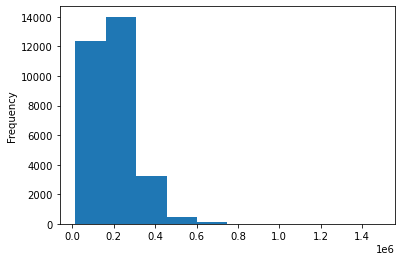

In [12]:
data["fnlwgt"].plot.hist()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education.num   30162 non-null  int64 
 4   marital.status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   capital.gain    30162 non-null  int64 
 9   capital.loss    30162 non-null  int64 
 10  hours.per.week  30162 non-null  int64 
 11  native.country  30162 non-null  object
 12  income01        30162 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 3.2+ MB


# Model 1: Decision Tree

In [14]:
data=pd.get_dummies(data, drop_first = True)
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income01,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# select y(class)
y = data["income01"]

# extract X
X = data.drop('income01', 1)

## Split dataset into training set and test set (70% for trainging and 30% for testing)

In [16]:
# Split dataset into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(21113, 76) (21113,)
(9049, 76) (9049,)


In [51]:
# Create Decision Tree classifer object
clf_simple = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf_simple.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_simple.predict(X_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8112498618631893


In [53]:
# a nicer way to visualize the confusion matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
display(df_confusion)

Predicted,0,1
Actual,,
0,1142,439
1,751,254


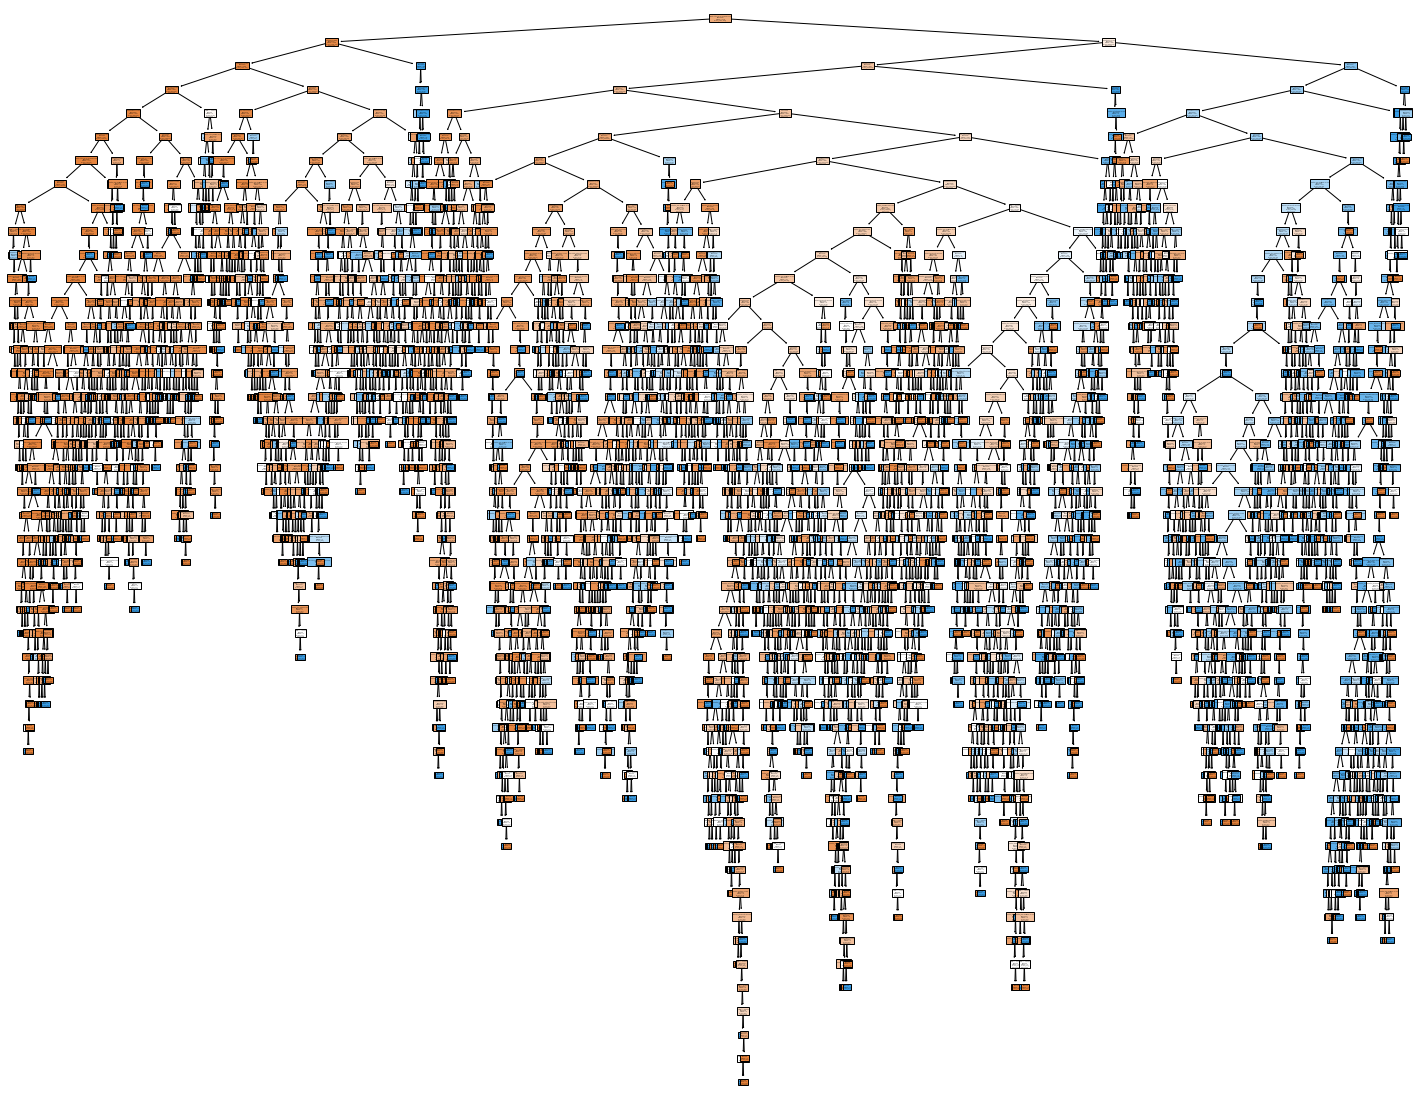

In [55]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf_simple, 
                   feature_names=X.columns,  
                   class_names=["<50k",">=50k"],
                   filled=True)

In [86]:
# create list for different K-fold
min_split = [10,50,100,200,500,1000,2000,5000,10000,20000]
acc_list = []

In [87]:
# create list for different max depth
max_depth = [3,4,5,6,7,8,9,10,11,12,13,14]
acc_list = []

In [91]:
dic_record = {"highest_acc":0,"max_depth":0,"min_split":0}

In [92]:
for i in range(len(max_depth)):
    for j in range(len(min_split)):
        # Create Decision Tree classifer object
        clf_user = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = max_depth[i],
                                 min_samples_split = min_split[j])

        # Train Decision Tree Classifer
        clf = clf_user.fit(X_train,y_train)

        #Predict the response for test dataset
        y_pred = clf_user.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        print("When max depth is {} and min split is {}, the accuracy is {}".format(max_depth[i],min_split[j],acc))
        if acc > dic_record["highest_acc"]:
            dic_record["highest_acc"] = acc
            dic_record["max_depth"] =  max_depth[i]
            dic_record["min_split"] =  min_split[j]
        acc_list.append(metrics.accuracy_score(y_test, y_pred))

When max depth is 3 and min split is 10, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 50, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 100, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 200, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 500, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 1000, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 2000, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 5000, the accuracy is 0.8419714885622721
When max depth is 3 and min split is 10000, the accuracy is 0.7594209304895568
When max depth is 3 and min split is 20000, the accuracy is 0.7493645706707923
When max depth is 4 and min split is 10, the accuracy is 0.8419714885622721
When max depth is 4 and min split is 50, the accuracy is 0.8419714885622721
When max depth is 4 and min split is 100, the accuracy is 0.8419714885622

When max depth is 13 and min split is 2000, the accuracy is 0.8483810365786275
When max depth is 13 and min split is 5000, the accuracy is 0.8419714885622721
When max depth is 13 and min split is 10000, the accuracy is 0.7594209304895568
When max depth is 13 and min split is 20000, the accuracy is 0.7493645706707923
When max depth is 14 and min split is 10, the accuracy is 0.8491546027185324
When max depth is 14 and min split is 50, the accuracy is 0.8534644712122886
When max depth is 14 and min split is 100, the accuracy is 0.8528014145209415
When max depth is 14 and min split is 200, the accuracy is 0.8503702066526688
When max depth is 14 and min split is 500, the accuracy is 0.8522488672781523
When max depth is 14 and min split is 1000, the accuracy is 0.8480495082329539
When max depth is 14 and min split is 2000, the accuracy is 0.8483810365786275
When max depth is 14 and min split is 5000, the accuracy is 0.8419714885622721
When max depth is 14 and min split is 10000, the accuracy

In [93]:
dic_record

{'highest_acc': 0.8539065090065201, 'max_depth': 13, 'min_split': 50}

In [109]:
# Create Decision Tree classifer object
clf_user = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 6,
                                 min_samples_split = 1000)

# Train Decision Tree Classifer
clf = clf_user.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_user.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.849486131064206


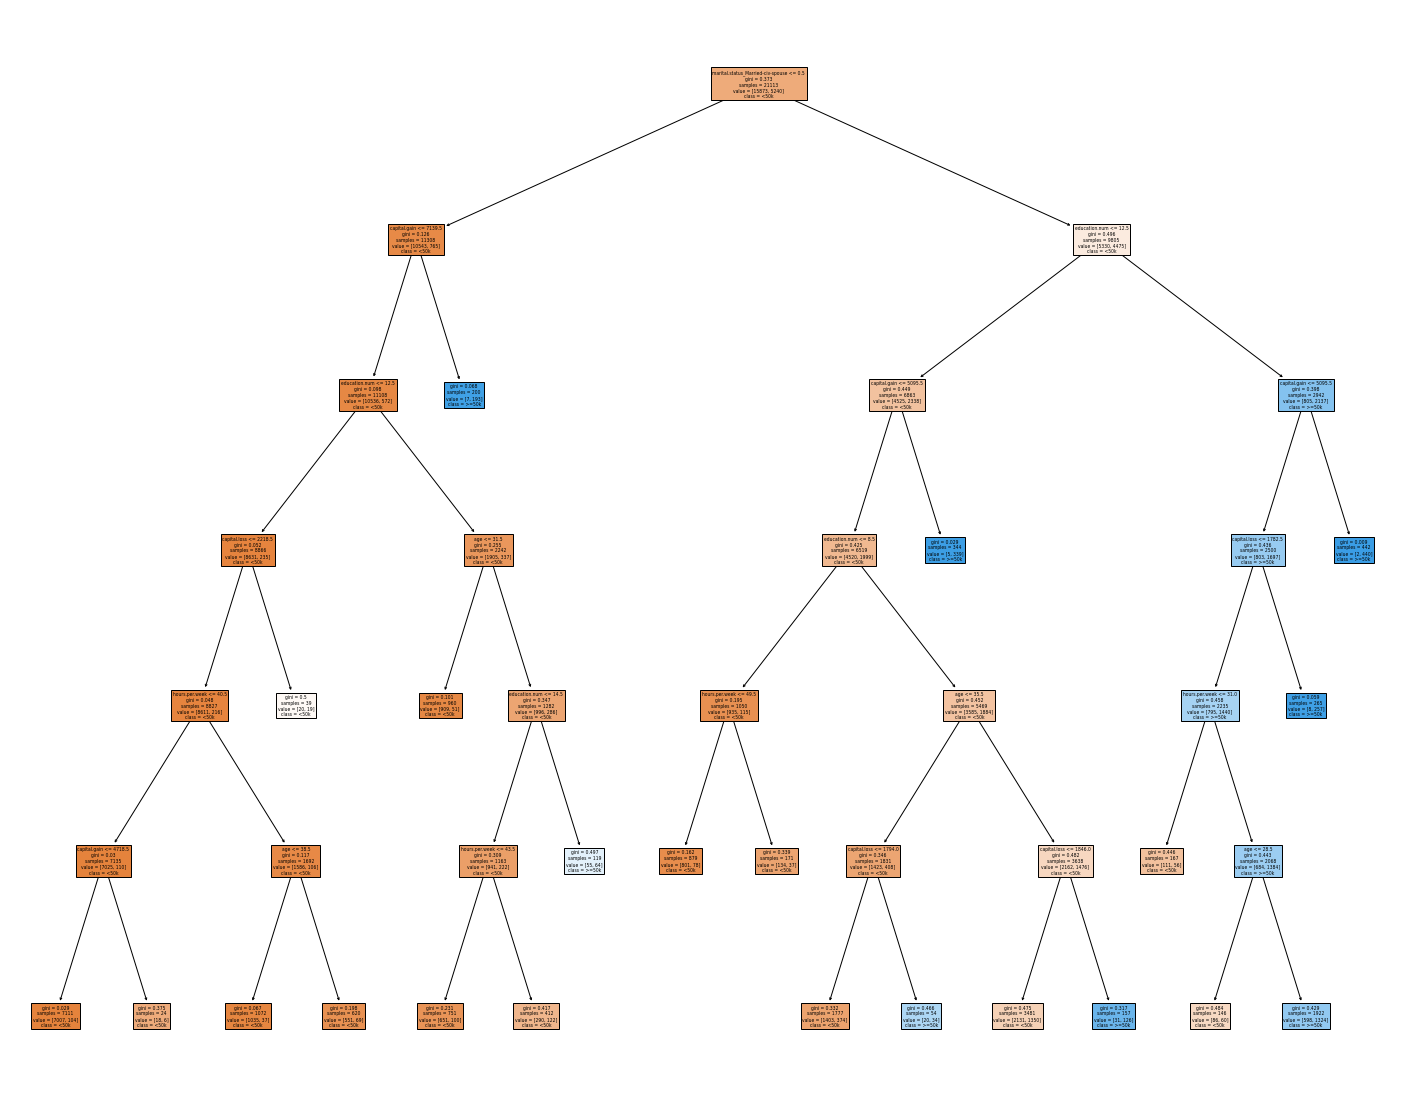

In [110]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
a = tree.plot_tree(clf_user, 
                   feature_names=X.columns,  
                   class_names=["<50k",">=50k"],
                   filled=True)

Feature: 0, Score: 0.04331
Feature: 1, Score: 0.00579
Feature: 2, Score: 0.22582
Feature: 3, Score: 0.19587
Feature: 4, Score: 0.04277
Feature: 5, Score: 0.03224
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.00056
Feature: 9, Score: 0.00273
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00131
Feature: 13, Score: 0.42591
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00005
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00118
Feature: 20, Score: 0.00422
Feature: 21, Score: 0.00402
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00334
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00118
Feature: 27, Score: 0.00224
Feature: 28, Score: 0.00071
Feature: 29, Score: 0.00187
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00050
Feature: 35, Score: 0.00121
Fe

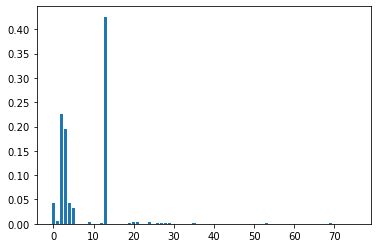

In [99]:
from matplotlib import pyplot
importance = clf_user.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Feature 0,2,3,4,5,13 are seemed to be important because they have relatively high score. Let's find out who they are.

In [100]:
data.columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'income01', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital.status_Married-AF-spouse',
       'marital.status_Married-civ-spouse',
       'marital.status_Married-spouse-absent', 'marital.status_Never-married',
       'marital.status_Separated', 'marital.status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'se

In [104]:
import_col = data.columns[[0,2,3,4,5,13]]
import_col

Index(['age', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week', 'marital.status_Married-AF-spouse'],
      dtype='object')

# It makes a lot of sense that 'age', 'education.num', 'capital.gain', 'capital.loss','hours.per.week', 'marital.status_Married-AF-spouse' are important!

# Model 2: Random Forest

In [24]:
from sklearn.metrics import accuracy_score, recall_score

model = RandomForestClassifier(random_state=1,n_estimators = 1000,max_depth = 6,min_samples_split = 1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.838324676759863


In [25]:
# create list for different max depth and number of bagging trees
max_depth = [3,4,5,6,7,8,9,10]
num_trees = [100,200,300,400,500,1000,2000]
acc_list = []

In [26]:
dic_record = {"highest_acc":0,"max_depth":0,"num_trees":0}

In [28]:
for i in range(len(max_depth)):
    for j in range(len(num_trees)):
        # Create Random Forest classifer object
        model = RandomForestClassifier(random_state=1,n_estimators = num_trees[j],
                                       max_depth = max_depth[i],min_samples_split = 1000)

        # Train Decision Tree Classifer
        clf = model.fit(X_train,y_train)

        #Predict the response for test dataset
        y_pred = model.predict(X_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        print("When max depth is {} and min split is {}, the accuracy is {}".format(max_depth[i],num_trees[j],acc))
        if acc > dic_record["highest_acc"]:
            dic_record["highest_acc"] = acc
            dic_record["max_depth"] =  max_depth[i]
            dic_record["num_trees"] =  num_trees[j]
        acc_list.append(metrics.accuracy_score(y_test, y_pred))

When max depth is 3 and min split is 100, the accuracy is 0.779423140678528
When max depth is 3 and min split is 200, the accuracy is 0.7795336501270859
When max depth is 3 and min split is 300, the accuracy is 0.7834014808266107
When max depth is 3 and min split is 400, the accuracy is 0.7843960658636313
When max depth is 3 and min split is 500, the accuracy is 0.785390650900652
When max depth is 3 and min split is 1000, the accuracy is 0.7851696320035363
When max depth is 3 and min split is 2000, the accuracy is 0.7841750469665156
When max depth is 4 and min split is 100, the accuracy is 0.7974361807934578
When max depth is 4 and min split is 200, the accuracy is 0.7999778981102884
When max depth is 4 and min split is 300, the accuracy is 0.8008619736987512
When max depth is 4 and min split is 400, the accuracy is 0.8035142004641397
When max depth is 4 and min split is 500, the accuracy is 0.8014145209415405
When max depth is 4 and min split is 1000, the accuracy is 0.803072162669908

In [29]:
dic_record

{'highest_acc': 0.8521383578295945, 'max_depth': 13, 'num_trees': 400}

# We believe that the highest accuracy is achieved when max depth = 13 and the number of bagging tree used should be 400.

In [30]:
model = RandomForestClassifier(random_state=1,n_estimators = 400,max_depth = 13,min_samples_split = 1000).fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.8521383578295945


In [31]:
# a nicer way to visualize the confusion matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
display(df_confusion)

Predicted,0,1
Actual,,
0,1329,252
1,846,159


# Model 3: XGBoost

In [1]:
import xgboost as xgb

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=373)

In [44]:
from sklearn.metrics import accuracy_score, recall_score
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42,eta = 0.05,max_depth=7,n_estimators=400)
xgb_model.fit(X_train,y_train)

y_pred = xgb_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [45]:
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.8630787932368218


In [46]:
# a nicer way to visualize the confusion matrix
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
display(df_confusion)

Predicted,0,1
Actual,,
0,1236,325
1,747,184


In [ ]:
y X

In [18]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.12), \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X)
pred = clf.predict(X)
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())

 1    26542
-1     3620
Name: anomaly, dtype: int64


In [20]:
data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income01,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,34,216864,9,0,3770,45,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,38,150601,6,0,3770,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
X = data[["education.num","capital.gain","capital.loss","hours.per.week"]]

In [32]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.05), \
                        n_jobs=-1, random_state=42, verbose=0)
clf.fit(X)
pred = clf.predict(X)
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())

 1    28661
-1     1501
Name: anomaly, dtype: int64


<AxesSubplot:ylabel='Frequency'>

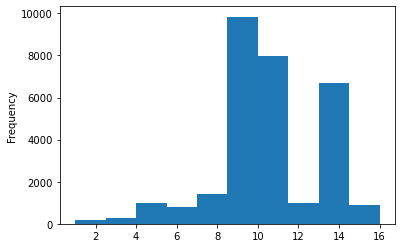

In [33]:
data["education.num"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

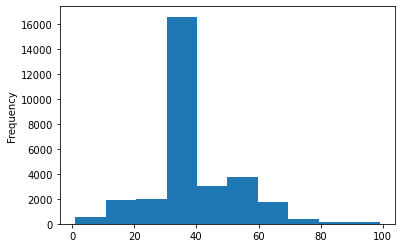

In [34]:
data["hours.per.week"].plot.hist()

<AxesSubplot:xlabel='capital.loss', ylabel='capital.gain'>

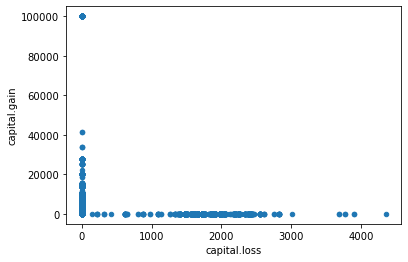

In [17]:
data.plot.scatter("capital.loss","capital.gain")

<AxesSubplot:ylabel='Frequency'>

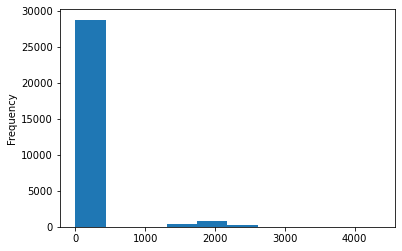

In [35]:
data["capital.loss"].plot.hist()

In [37]:
data["capital.loss"].max()

4356

In [45]:
data["capital.loss"].mean()

88.37248856176646

In [41]:
data[data["capital.loss"]==4356]

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income01,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:ylabel='Frequency'>

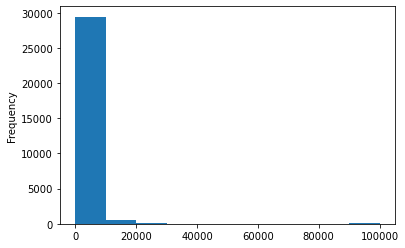

In [38]:
data["capital.gain"].plot.hist()

In [39]:
data["capital.gain"].max()

99999

In [43]:
len(data[data["capital.gain"]==99999])

148

In [44]:
data["capital.gain"].mean()

1092.0078575691268

In [18]:
X = data[["capital.gain","capital.loss"]]

In [35]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(.01), \
                        n_jobs=-1, random_state=42, verbose=0)
clf.fit(X)
pred = clf.predict(X)
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())

 1    29895
-1      267
Name: anomaly, dtype: int64


In [36]:
X[X["anomaly"]==-1].head(10)

,capital.gain,capital.loss,anomaly
1,0,4356,-1
3,0,3900,-1
4,0,3900,-1
5,0,3770,-1
6,0,3770,-1
7,0,3683,-1
8,0,3683,-1
10,0,3004,-1
1519,99999,0,-1
1520,99999,0,-1


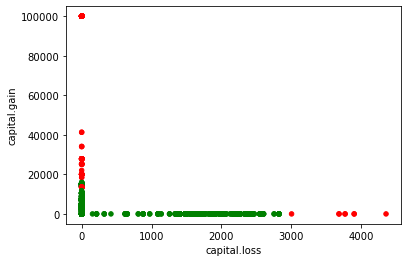

In [37]:
colors = np.where(X["anomaly"]==-1,'r','-')
colors[X["anomaly"]==1] = 'g'
X.plot.scatter("capital.loss","capital.gain",c=colors)
plt.show()